In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

plt.rcParams['figure.figsize'] = (9, 6)
%matplotlib notebook

def combinations(n, k):
    """сочетания"""
    return int(factorial(n) / (factorial(n - k) * factorial(k)))


def permutations(n):
    """перестановки"""
    return int(factorial(n))


def arrangements(n, k):
    """размещения"""
    return int(factorial(n) / factorial(n - k))

### 1) Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.

Найдем вероятность по формуле Бернулли:
$$
P_{n}(X=k)=C_{n}^{k}p^{k}q^{n-k}
$$

Для этого созадим функцию

In [18]:
def bernoulli_binomial(p, n, k):
    """
    p — вероятность наступления события
    n - кол-во независимых испытаний
    k - число наступления события [0,  n ]
    """
    q = 1 - p
    c = combinations(n, k)
    
    return c * p**k * q**(n-k)

Воспользуемся формулой

In [19]:
p = 0.8
n = 100
k = 85
P = bernoulli_binomial(p, n, k)
P

0.04806179370074634

Создадим 10^5 семплов с биноминальным распределением в каждом из которых 100 испытаний и вероятностью события 0.8, и нарисуем гистрограмму

<IPython.core.display.Javascript object>


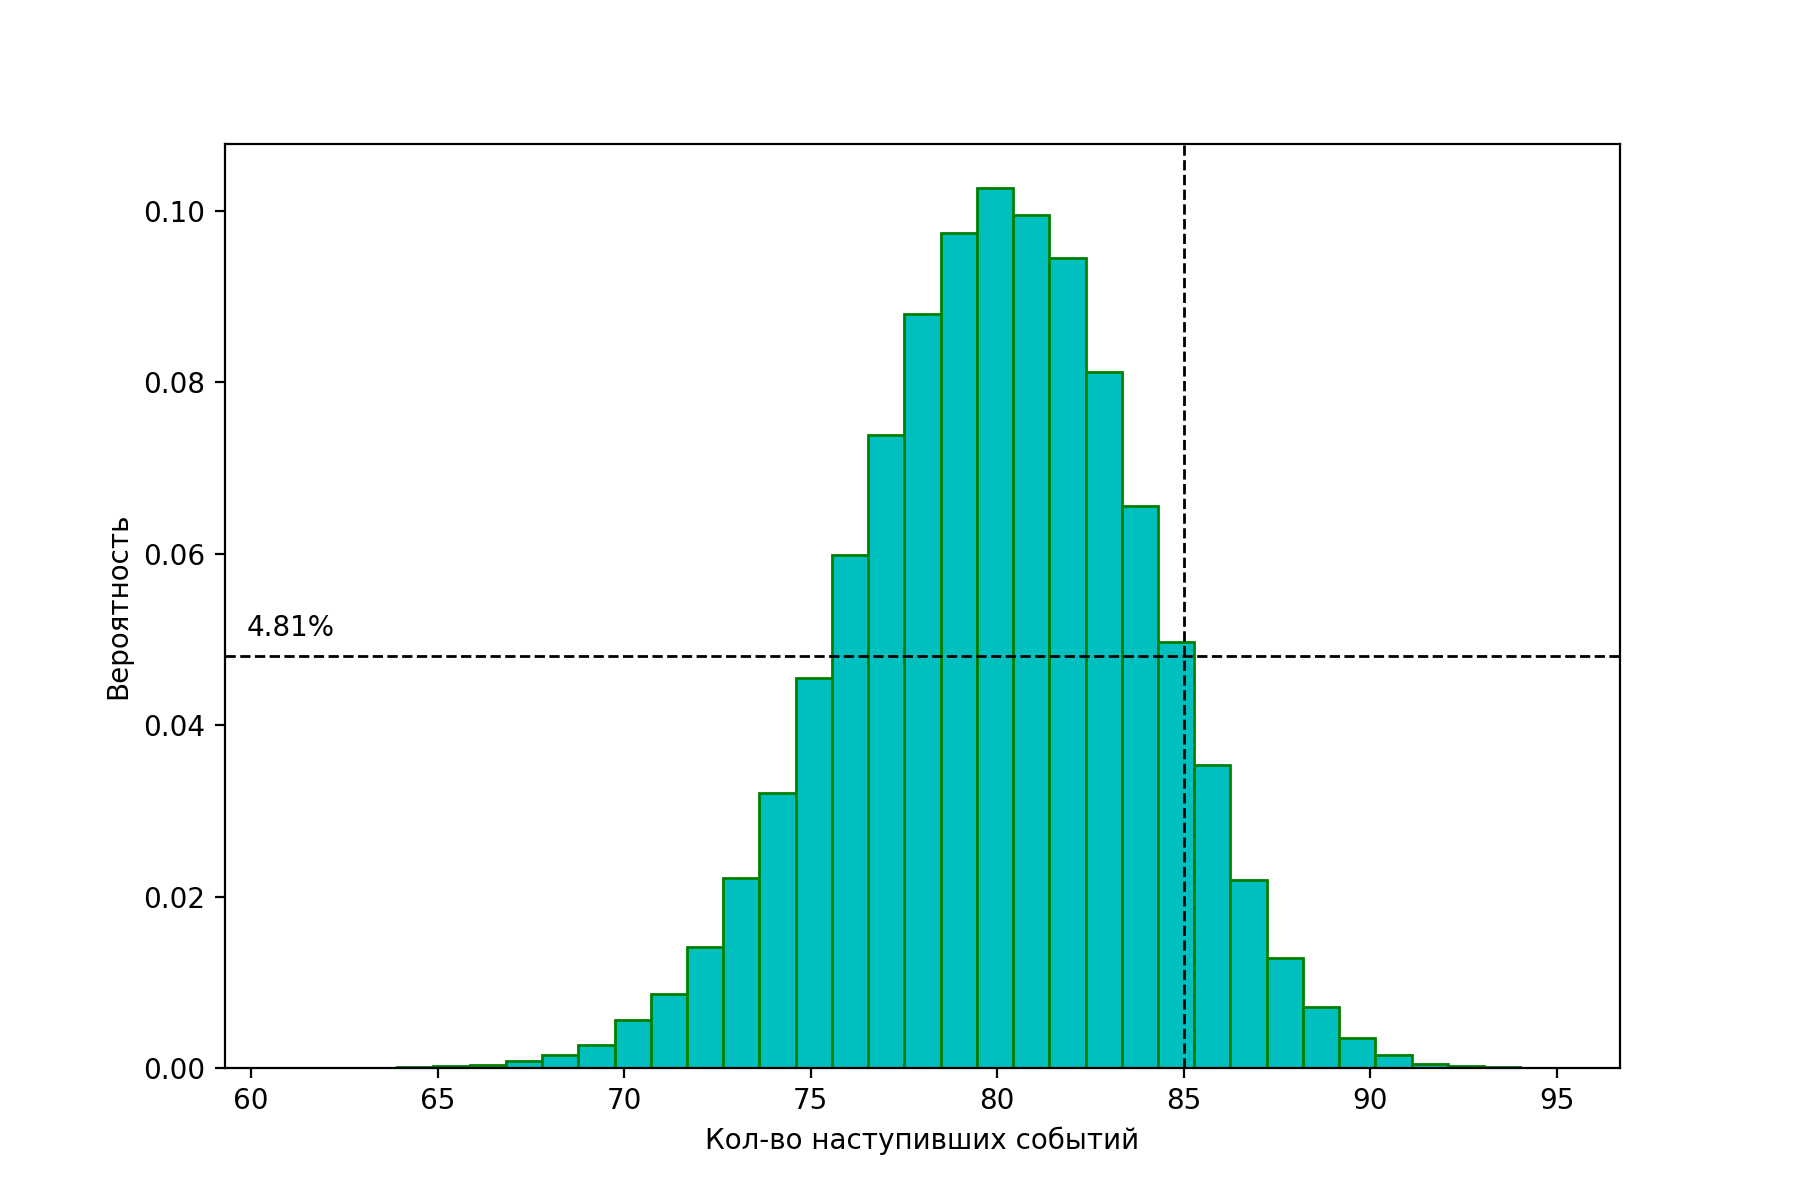

In [20]:
np.random.seed(42)
s = np.random.binomial(n, p, 10**5)
plt.close()
plt.hist(s, bins=35, color='c', edgecolor='g', density=True)

plt.axvline(k, color='k', linestyle='dashed', linewidth=1)
plt.axhline(P, color='k', linestyle='dashed', linewidth=1)

plt.xlabel('Кол-во наступивших событий')
plt.ylabel('Вероятность')

min, _ = plt.xlim()
plt.text(min * 1.01, P * 1.05, f'{np.round(P* 100, decimals=2)}%');

**Ответ: 4.81%**

### 2) Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?

Для решения будем использовать распределение Пуассона
$$
P_{m}\approx \frac{\lambda ^{m}}{m!}e^{-\lambda}
$$

Для этого созадим функцию

In [21]:
def poisson(p, n, m):
    """
    p - вероятность наступления события
    n - кол-во испытаний
    m - событие произойдет m раз в n испытаниях
    """
    lambda_ = n * p

    return (lambda_**m / factorial(m)) * np.exp(-lambda_)
    

In [22]:
p = 0.0004
n = 5000

Перегорят 2 лампочки

In [23]:
P2 = poisson(p, n, 2)
P2

0.2706705664732254

Перегорят 0 лампочек

In [24]:
P0 = poisson(p, n, 0)
P0

0.1353352832366127

Нарисуем график распределения Пуассона

In [25]:
x = np.arange(15)
y = poisson(p, n, x)

<IPython.core.display.Javascript object>


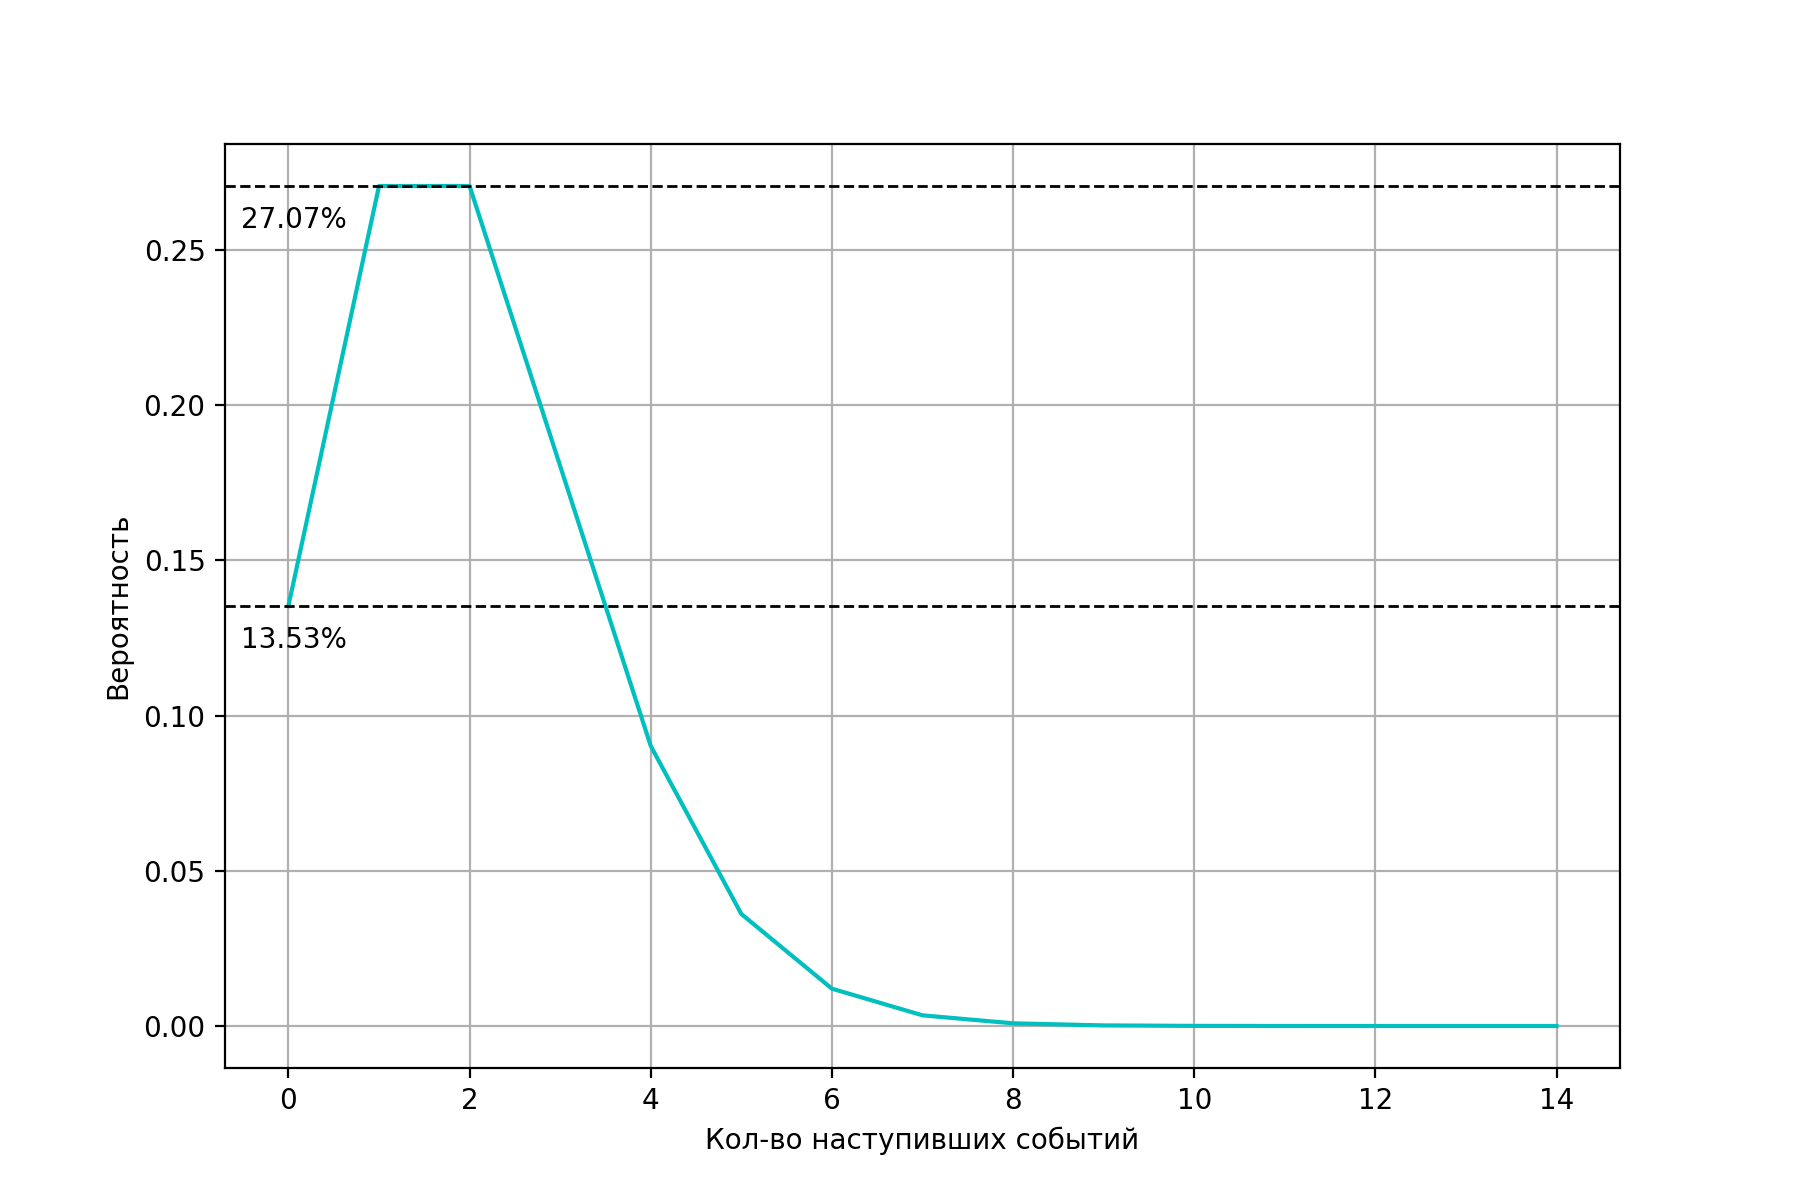

In [26]:
plt.close()
plt.plot(x, y, color='c')

plt.axhline(P0, color='k', linestyle='dashed', linewidth=1)
plt.axhline(P2, color='k', linestyle='dashed', linewidth=1)

min, _ = plt.xlim()
plt.text(min * 0.75, P0 * 0.90, f'{np.round(P0 * 100, decimals=2)}%');
plt.text(min * 0.75, P2 * 0.95, f'{np.round(P2 * 100, decimals=2)}%');

plt.xlabel('Кол-во наступивших событий')
plt.ylabel('Вероятность')

plt.grid()

**Ответ: Вероятность, что ни одна из лампочек не перегорит в первый день = 13.53% Вероятность, что перегорят ровно две = 27.07%**

### 3) Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

Найдем вероятность по формуле Бернулли:
$$
P_{n}(X=k)=C_{n}^{k}p^{k}q^{n-k}
$$

In [27]:
p = 0.5
n = 144
k = 70

In [28]:
P = bernoulli_binomial(p, n, k)
P

0.06281178035144777

Создадим 10^5 семплов с биноминальным распределением в каждом из которых 144 испытания и вероятностью события 0.5, и нарисуем гистрограмму

<IPython.core.display.Javascript object>


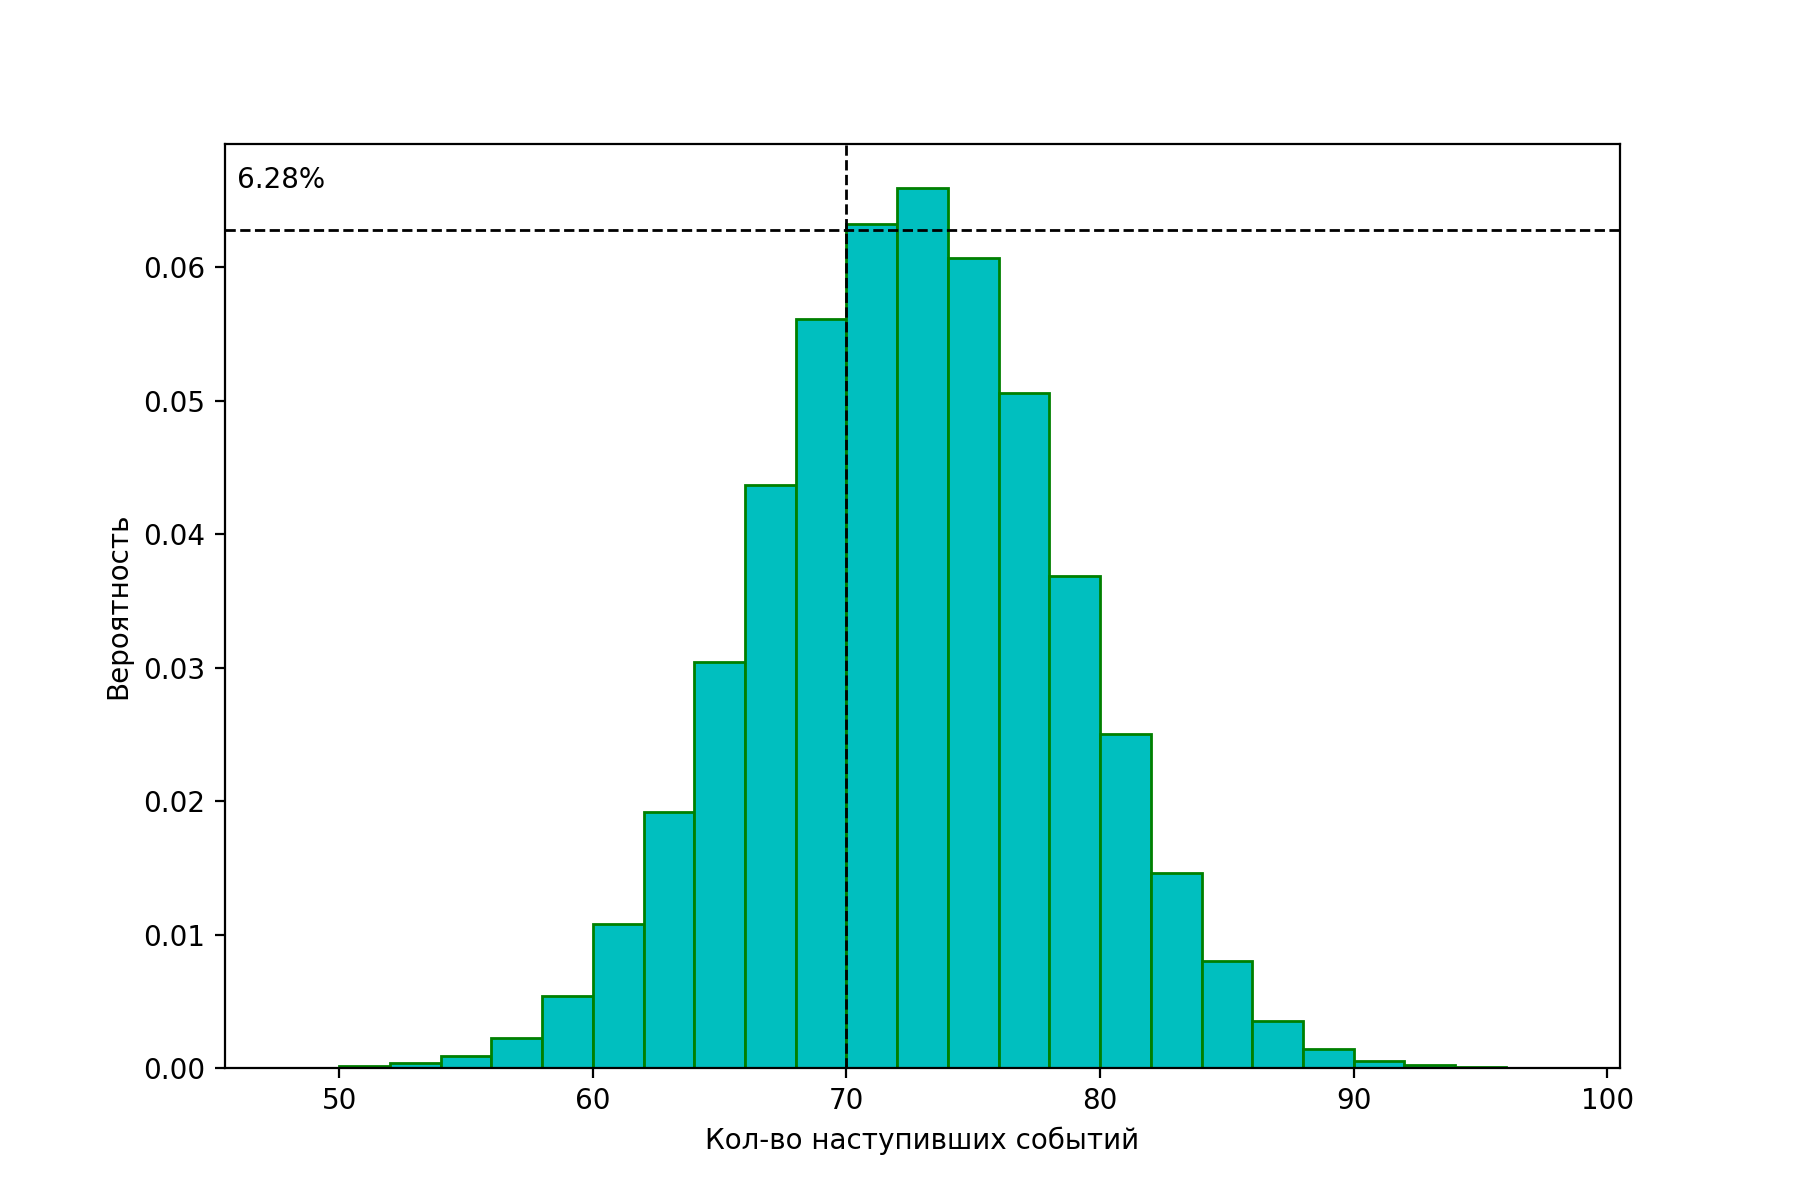

In [29]:
np.random.seed(43)
s = np.random.binomial(n, p, 10**5)
plt.close()
plt.hist(s, bins=25, color='c', edgecolor='g', density=True)

plt.axvline(k, color='k', linestyle='dashed', linewidth=1)
plt.axhline(P, color='k', linestyle='dashed', linewidth=1)

plt.xlabel('Кол-во наступивших событий')
plt.ylabel('Вероятность')

min, _ = plt.xlim()
plt.text(min * 1.01, P * 1.05, f'{np.round(P* 100, decimals=2)}%');

**Ответ: При подбрасывании монеты 144 раза, орел выпадет ровно 70 раз с вероятностью 6.28%**

### 4) В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. a) Какова вероятность того, что все мячи белые? б) Какова вероятность того, что ровно два мяча белые? в) Какова вероятность того, что хотя бы один мяч белый?

**a)**

In [30]:
p1 = combinations(7, 2)/combinations(10, 2)
p2 = combinations(9, 2)/combinations(11, 2)
P = p1 * p2
np.round(P*100, decimals=2)

30.55

**б)**

In [49]:
p11 = combinations(7, 2)/combinations(10, 2)
p12 = combinations(2, 2)/combinations(11, 2)
P1 = p11 * p12

p21 = combinations(3, 2)/combinations(10, 2)
p22 = combinations(9, 2)/combinations(11, 2)
P2 = p21 * p22

p31 = (combinations(7,1) * combinations(3,1)) / combinations (10,2)
p32 = (combinations(9,1) * combinations(2,1)) / combinations (11,2)
P3 = p31 * p32

P = P1 + P2 + P3
np.round(P*100, decimals=2)

20.48

**в)**

In [50]:
P = 1 - ((combinations(3, 2)/combinations(10, 2)) * (combinations(2, 2)/combinations(11, 2)))
np.round(P*100, decimals=2)

99.88

**Ответ: a) 30.55%, б) 20.48%, в) 99.88%**